In [3]:
import iplantuml

In [4]:
%%plantuml
@startuml
title Diagramme de cas d'usage (Vue globale)

left to right direction
actor "Utilisateur" as U
actor "Conducteur" as C
actor "Passager" as P

rectangle "Système Covoiturage" as SYS {
  usecase "Créer un compte" as UC_Inscription
  usecase "S'authentifier / Gérer son profil" as UC_Profil

  usecase "Proposer un trajet" as UC_Proposer
  usecase "Gérer un trajet\n(modifier, annuler, clôturer)" as UC_GererTrajet

  usecase "Rechercher des trajets" as UC_Rechercher
  usecase "Réserver un trajet" as UC_Reserver
  usecase "Gerer une réservation" as UC_GererResa
  usecase "Laisser un avis / une note\n(sur un trajet passé)" as UC_Avis
}

' Relations acteur -> UC
U -- UC_Inscription
U -- UC_Profil

C -- UC_Proposer
' C -- UC_GererTrajet

P -- UC_Rechercher
P -- UC_Reserver
' P -- UC_GererResa
' P -- UC_Avis

' Liens include/extend (logique)
UC_Profil .> UC_Inscription : <<include>>\n(l'utilisateur doit exister)
UC_Avis .> UC_Reserver : <<extend>>\n(réservation passée et réalisée)
UC_GererTrajet .> UC_Proposer : <<extend>>\n(le trajet existe)
UC_GererResa .> UC_Reserver : <<extend>>\n(la réservation existe)
@enduml

CalledProcessError: Command '['plantweb', '--format', 'auto', '2c429be3-543a-4fe2-a0d7-9ad17983988d.uml']' returned non-zero exit status 1.

/usr/local/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
Writing output for /Users/maximegesset/Files/Univ/M1/UE731/Murisasco/Covoiturage/4acbad52-e6cb-4cdd-a9a9-3bfb20bbf5ba.uml to 4acbad52-e6cb-4cdd-a9a9-3bfb20bbf5ba.svg


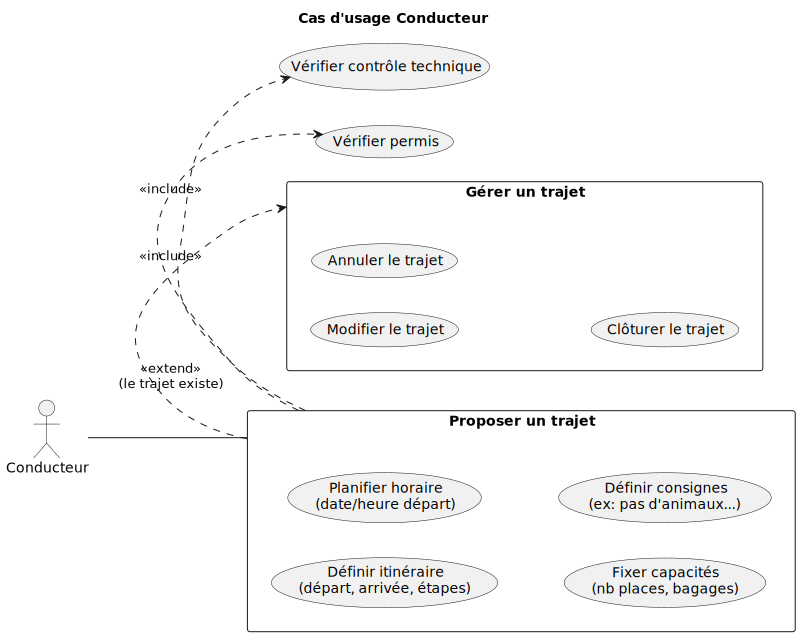

In [ ]:
%%plantuml
@startuml
title Cas d'usage Conducteur

left to right direction
actor "Conducteur" as C

rectangle "Proposer un trajet" as UC_Proposer {
  usecase "Définir itinéraire\n(départ, arrivée, étapes)" as UC_Itin
  usecase "Planifier horaire\n(date/heure départ)" as UC_Horaire
  usecase "Fixer capacités\n(nb places, bagages)" as UC_Capacite
  usecase "Définir consignes\n(ex: pas d'animaux...)" as UC_Consignes
}
rectangle "Gérer un trajet" as UC_Gerer {
    usecase "Modifier le trajet" as UC_Modifier
    usecase "Annuler le trajet" as UC_Annuler
    usecase "Clôturer le trajet" as UC_Cloturer
    }

usecase "Vérifier permis" as UC_VerifPermis
usecase "Vérifier contrôle technique" as UC_VerifCT

C -- UC_Proposer
UC_Proposer .> UC_Gerer : <<extend>>\n(le trajet existe)



UC_Proposer .> UC_VerifPermis : <<include>>
UC_Proposer .> UC_VerifCT : <<include>>
@enduml


/usr/local/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
Writing output for /Users/maximegesset/Files/Univ/M1/UE731/Murisasco/Covoiturage/ab92812e-15c2-45f9-8828-db566e57340e.uml to ab92812e-15c2-45f9-8828-db566e57340e.svg


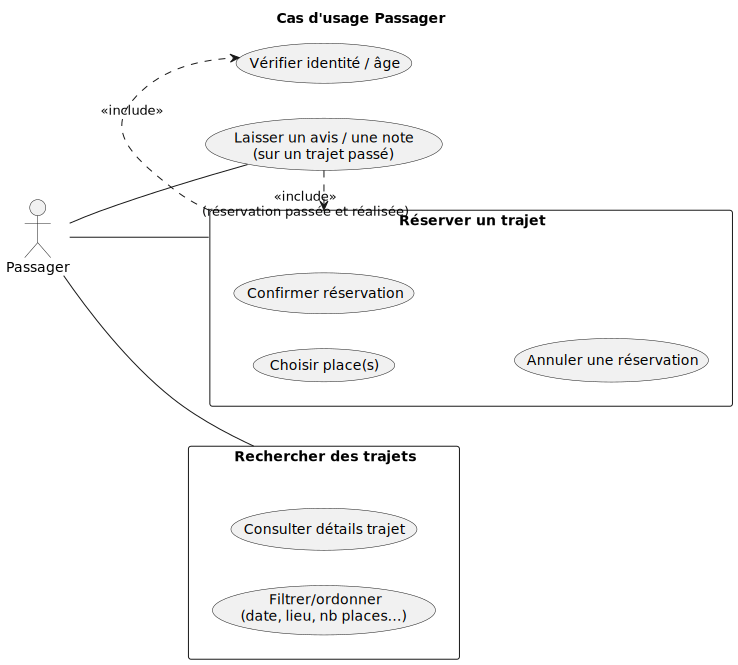

In [ ]:
%%plantuml
@startuml
title Cas d'usage Passager

left to right direction
actor "Passager" as P

rectangle "Rechercher des trajets" as UC_Rechercher { 
  usecase "Filtrer/ordonner\n(date, lieu, nb places…)" as UC_Filtrer
  usecase "Consulter détails trajet" as UC_Consulter
}

rectangle "Réserver un trajet" as UC_Reserver {
  usecase "Choisir place(s)" as UC_ChoixPlace
  usecase "Confirmer réservation" as UC_Confirmer
  usecase "Annuler une réservation" as UC_Annuler
}
usecase "Laisser un avis / une note\n(sur un trajet passé)" as UC_Avis
usecase "Vérifier identité / âge" as UC_VerifAge

P -- UC_Rechercher
P -- UC_Reserver
P -- UC_Avis

UC_Avis .> UC_Reserver : <<include>>\n(réservation passée et réalisée)
UC_Reserver .> UC_VerifAge : <<include>>
@enduml


/usr/local/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
Writing output for /Users/maximegesset/Files/Univ/M1/UE731/Murisasco/Covoiturage/2dc783c1-4196-415f-8d99-7310f6d8e351.uml to 2dc783c1-4196-415f-8d99-7310f6d8e351.svg


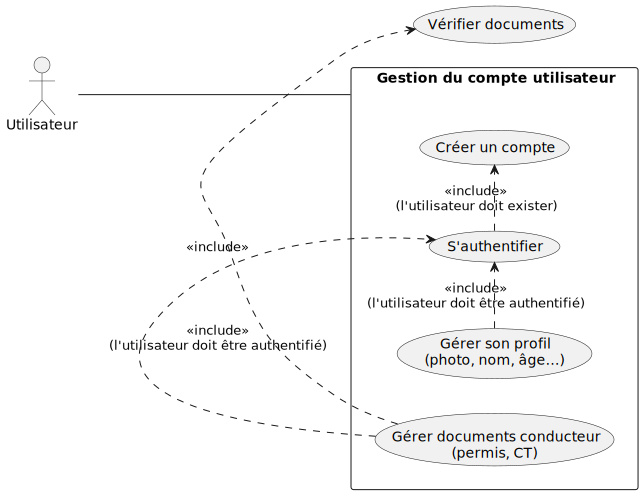

In [ ]:
%%plantuml
@startuml

left to right direction
actor "Utilisateur" as U

rectangle "Gestion du compte utilisateur" as SYS {
  usecase "Créer un compte" as UC_Create
  usecase "S'authentifier" as UC_Login
  usecase "Gérer son profil\n(photo, nom, âge…)" as UC_Profil
  usecase "Gérer documents conducteur\n(permis, CT)" as UC_Doc
}
usecase "Vérifier documents" as UC_VerifDoc

U -- SYS

UC_Doc .> UC_VerifDoc : <<include>>
UC_Login .> UC_Create : <<include>>\n(l'utilisateur doit exister)
UC_Profil .> UC_Login : <<include>>\n(l'utilisateur doit être authentifié)
UC_Doc .> UC_Login : <<include>>\n(l'utilisateur doit être authentifié)
@enduml


# UC1 - Créer un compte

**Résumé**  
Permet à un nouvel utilisateur de créer un compte pour accéder aux fonctionnalités (réserver / proposer).

**Acteurs**  
- Acteur principal : Utilisateur  
- Acteur(s) secondaire(s) : Service e-mail (envoi de code de validation)

**Préconditions**  
- L’utilisateur n’est pas authentifié.  
- Le système est disponible.

**Scénario nominal**  
1. L’utilisateur ouvre « Créer un compte ».  
2. Il saisit e-mail, mot de passe, prénom, date de naissance.  
3. Le système vérifie la validité des champs.  
4. Le système envoie un code de validation par e-mail.  
5. L’utilisateur saisit le code.  
6. Le système confirme la création du compte et connecte l’utilisateur.

**Enchaînements alternatifs**  
- A1. Mot de passe faible → Le système propose des contraintes, l’utilisateur corrige, revient à l’étape 3.  
- A2. Compte déjà existant → Le système propose « Se connecter » ou « Réinitialiser le mot de passe ».

**Exceptions**  
- E1. E-mail de validation non reçu / expiré → Le système propose « Renvoyer le code ».  
- E2. Service e-mail indisponible → Le système affiche un message d’indisponibilité, invite à réessayer plus tard.

**Post-conditions**  
- Un compte actif existe pour cet e-mail.  
- L’utilisateur est authentifié.  


---

# UC2 - Proposer un trajet (Conducteur)

**Résumé**  
Un conducteur publie un nouveau trajet à une date donnée, avec un nombre de places.

**Acteurs**  
- Principal : Conducteur  
- Secondaires : Service de vérification documents (permis, contrôle technique)

**Préconditions**  
- Conducteur authentifié.  
- Permis et contrôle technique valides dans le système.

**Scénario nominal**  
1. Le conducteur ouvre « Proposer un trajet ».  
2. Il saisit départ, arrivée, date/heure, prix indicatif, nb de places, consignes.  
3. Le système vérifie la cohérence (date future, nb places ≥ 1).  
4. Le système vérifie permis et contrôle technique valides.  
5. Le conducteur publie le trajet.  
6. Le système rend le trajet visible dans la recherche.

**Enchaînements alternatifs**  
- A1. Étapes intermédiaires (waypoints) → Le conducteur ajoute des étapes ; le système recalculera la visibilité pour ces étapes.  
- A2. Modification avant publication → Le conducteur modifie des champs, puis publie (retour à l’étape 5).

**Exceptions**  
- E1. Permis ou CT manquants/expirés → Le système bloque la publication et demande la mise à jour des documents.  
- E2. Date passée → Le système refuse la publication et demande une nouvelle date.

**Post-conditions**  
- Un trajet publié existe et apparaît dans la recherche.  
- Les places disponibles sont initialisées.  

---

# UC3 - Rechercher et réserver un trajet (Passager)

**Résumé**  
Un passager trouve un trajet et effectue une réservation pour une ou plusieurs places.

**Acteurs**  
- Principal : Passager  
- Secondaires : - (aucun requis dans la version simple)

**Préconditions**  
- Passager authentifié.  
- Le trajet visé est publié et a des places disponibles.

**Scénario nominal**  
1. Le passager ouvre « Rechercher ».  
2. Il renseigne critères (départ, arrivée, date).  
3. Le système affiche une liste de trajets disponibles.  
4. Le passager consulte le détail d’un trajet.  
5. Il choisit le nombre de places (≤ places disponibles).  
6. Il confirme la réservation.  
7. Le système crée la réservation, décrémente les places, confirme au passager.

**Enchaînements alternatifs**  
- A1. Filtrage/tri → Le passager applique des filtres (prix, heure, étapes), puis reprend à l’étape 3.  
- A2. Passager mineur → Le système vérifie l’âge ; si mineur, affiche les règles spécifiques (ex. accompagnement), puis peut autoriser/refuser selon la politique ; si autorisé, reprendre à l’étape 6.

**Exceptions**  
- E1. Double réservation du même trajet → Le système bloque (règle AntiDouble), propose d’ouvrir « Mes réservations ».  
- E2. Passager = conducteur du trajet → Le système bloque (règle AntiSelf).  
- E3. Plus de places entre la consultation et la confirmation (concurrence) → Le système refuse et réactualise les disponibilités.

**Post-conditions**  
- Une réservation active existe pour ce passager et ce trajet.  
- Le compteur de places a été mis à jour.  

---

# UC4 - Annuler une réservation (Passager)

**Résumé**  
Permet au passager d’annuler une réservation existante, selon les règles.

**Acteurs**  
- Principal : Passager

**Préconditions**  
- Passager authentifié.  
- Réservation existante et annulable (ex. avant l’heure limite).

**Scénario nominal**  
1. Le passager ouvre « Mes réservations ».  
2. Il sélectionne une réservation active.  
3. Il clique « Annuler ».  
4. Le système demande confirmation.  
5. Le passager confirme.  
6. Le système annule la réservation et ré-incrémente les places du trajet.

**Enchaînements alternatifs**  
- A1. Raison d’annulation → Le système propose un motif (facultatif), le passager renseigne, puis étape 6.

**Exceptions**  
- E1. Dépassement de l’heure limite → Le système refuse l’annulation et explique la règle.  
- E2. Trajet déjà effectué → Le système refuse (statut “passé”).  
- E3. Incohérence concurrence (trajet annulé par le conducteur pendant l’action) → Le système informe que le trajet n’existe plus ; la réservation passe en “annulée par conducteur”.

**Post-conditions**  
- La réservation est en statut “annulée (par passager)”.  
- Les places du trajet sont mises à jour si applicable.

---

# UC5 - Laisser un avis / une note (Passager)

**Résumé**  
Un passager laisse un avis sur un trajet réalisé.

**Acteurs**  
- Principal : Passager

**Préconditions**  
- Passager authentifié.  
- Réservation liée au trajet en statut “effectué”.

**Scénario nominal**  
1. Le passager ouvre « Historique ».  
2. Il choisit un trajet effectué.  
3. Il sélectionne « Laisser un avis ».  
4. Il saisit note et commentaire.  
5. Il publie.  
6. Le système enregistre l’avis et l’associe au trajet / conducteur.

**Enchaînements alternatifs**  
- A1. Anonymisation → Le passager coche « avis anonyme » (si la politique le permet).  
- A2. Modifier un avis récent → Le système autorise la modification dans une fenêtre limitée (ex. 24h).

**Exceptions**  
- E1. Trajet non effectué → Le système refuse (preuve par statut).  
- E2. Avis déjà laissé → Le système refuse la duplication, propose de modifier l’avis existant (si fenêtre ouverte).

**Post-conditions**  
- Un avis valide est stocké et visible selon les règles.

---

# UC6 - Gérer un trajet (modifier / clôturer) (Conducteur)

**Résumé**  
Le conducteur modifie un trajet publié (heure, consignes…) ou le clôture/annule.

**Acteurs**  
- Principal : Conducteur  
- Secondaire : Passagers (informés via notifications)

**Préconditions**  
- Conducteur authentifié.  
- Trajet existant dont il est propriétaire.

**Scénario nominal (modification simple)**  
1. Le conducteur ouvre « Mes trajets ».  
2. Il sélectionne un trajet publié.  
3. Il modifie un champ autorisé (ex. heure).  
4. Il enregistre.  
5. Le système met à jour le trajet et notifie les passagers réservés.

**Enchaînements alternatifs**  
- A1. Clôturer le trajet (après réalisation) → Le conducteur choisit « Clôturer » ; le système passe le statut à “effectué”.  
- A2. Annuler le trajet (avant réalisation) → Le conducteur choisit « Annuler » ; le système annule le trajet et notifie les passagers (leurs réservations deviennent “annulées par conducteur”).

**Exceptions**  
- E1. Modification interdite (ex. réduction de places < réservées) → Le système refuse et explique la contrainte.  
- E2. Tentative de modification après clôture → Le système refuse (statut final).

**Post-conditions**  
- Trajet mis à jour ou statut final appliqué.  
- Notifications envoyées aux passagers concernés.

---

# UC7 - Gérer les documents conducteur (Permis / Contrôle technique)

**Résumé**  
Le conducteur ajoute/actualise ses documents ; le système vérifie la validité.

**Acteurs**  
- Principal : Conducteur  
- Secondaire : Service de vérification documentaire (manuel ou automatique)

**Préconditions**  
- Conducteur authentifié.

**Scénario nominal**  
1. Le conducteur ouvre « Mes documents ».  
2. Il téléverse les justificatifs (permis, CT).  
3. Le système contrôle le format et la lisibilité.  
4. Le système enregistre et lance la vérification.  
5. Le système marque les documents « valides » si vérifiés.

**Enchaînements alternatifs**  
- A1. Vérification différée → Statut « en cours » ; le conducteur est notifié lors de la validation.

**Exceptions**  
- E1. Document expiré ou illisible → Le système refuse et demande un nouveau fichier.  
- E2. Vérification échouée → Statut « refusé » avec motif.

**Post-conditions**  
- État documentaire à jour (valide, en cours, refusé).  

Diagramme de séquence :

- UC1 : Créer un compte : 

/usr/local/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
Writing output for /Users/maximegesset/Files/Univ/M1/UE731/Murisasco/Covoiturage/587b9cc4-2d00-41e7-a815-19e25d79cb88.uml to 587b9cc4-2d00-41e7-a815-19e25d79cb88.svg


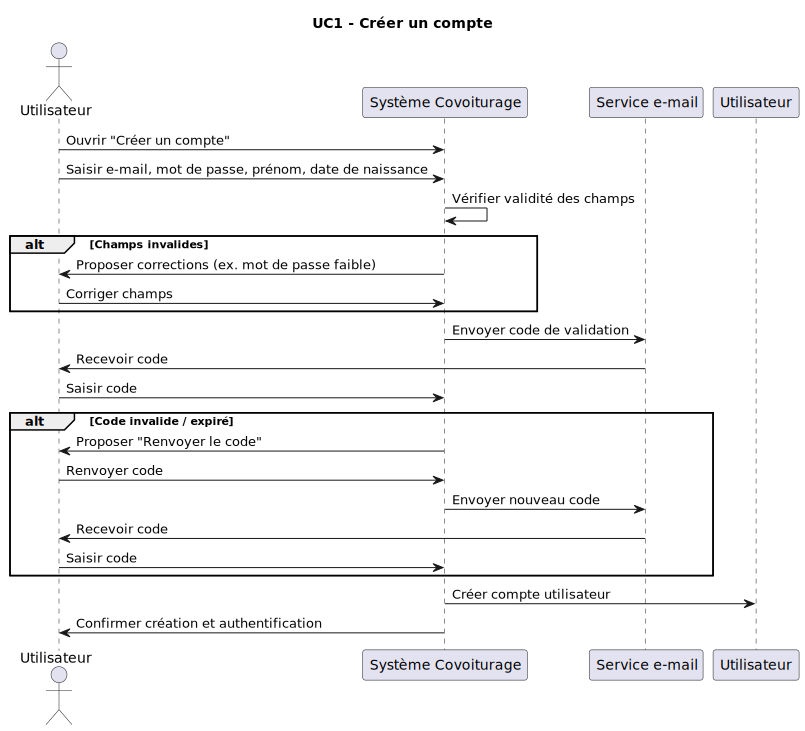

In [ ]:
%%plantuml
@startuml
title UC1 - Créer un compte

actor Utilisateur as U
participant "Système Covoiturage" as SYS
participant "Service e-mail" as MAIL
participant Utilisateur as Compte

U -> SYS : Ouvrir "Créer un compte"
U -> SYS : Saisir e-mail, mot de passe, prénom, date de naissance
SYS -> SYS : Vérifier validité des champs
alt Champs invalides
    SYS -> U : Proposer corrections (ex. mot de passe faible)
    U -> SYS : Corriger champs
end
SYS -> MAIL : Envoyer code de validation
MAIL -> U : Recevoir code
U -> SYS : Saisir code
alt Code invalide / expiré
    SYS -> U : Proposer "Renvoyer le code"
    U -> SYS : Renvoyer code
    SYS -> MAIL : Envoyer nouveau code
    MAIL -> U : Recevoir code
    U -> SYS : Saisir code
end
SYS -> Compte : Créer compte utilisateur
SYS -> U : Confirmer création et authentification
@enduml



- UC2 : Proposer un trajet (Conducteur)

/usr/local/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
Writing output for /Users/maximegesset/Files/Univ/M1/UE731/Murisasco/Covoiturage/fe2c8713-de37-4c7f-b5ac-e94cc79b4c80.uml to fe2c8713-de37-4c7f-b5ac-e94cc79b4c80.svg


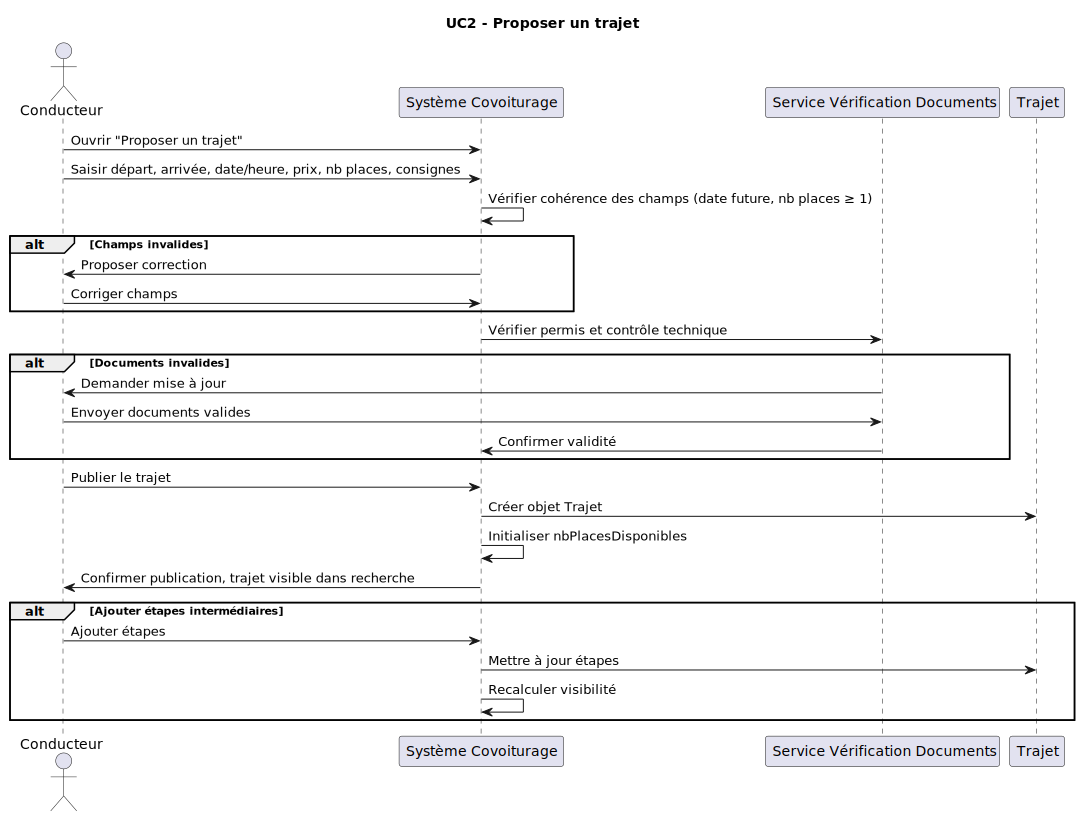

In [ ]:
%%plantuml
@startuml
title UC2 - Proposer un trajet

actor Conducteur as C
participant "Système Covoiturage" as SYS
participant "Service Vérification Documents" as DOC
participant Trajet as T

C -> SYS : Ouvrir "Proposer un trajet"
C -> SYS : Saisir départ, arrivée, date/heure, prix, nb places, consignes
SYS -> SYS : Vérifier cohérence des champs (date future, nb places ≥ 1)
alt Champs invalides
    SYS -> C : Proposer correction
    C -> SYS : Corriger champs
end
SYS -> DOC : Vérifier permis et contrôle technique
alt Documents invalides
    DOC -> C : Demander mise à jour
    C -> DOC : Envoyer documents valides
    DOC -> SYS : Confirmer validité
end
C -> SYS : Publier le trajet
SYS -> T : Créer objet Trajet
SYS -> SYS : Initialiser nbPlacesDisponibles
SYS -> C : Confirmer publication, trajet visible dans recherche
alt Ajouter étapes intermédiaires
    C -> SYS : Ajouter étapes
    SYS -> T : Mettre à jour étapes
    SYS -> SYS : Recalculer visibilité
end
@enduml


- UC3 : Réserver un trajet

/usr/local/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
Writing output for /Users/maximegesset/Files/Univ/M1/UE731/Murisasco/Covoiturage/2933ad45-8625-443d-b898-fd40762f2ec6.uml to 2933ad45-8625-443d-b898-fd40762f2ec6.svg


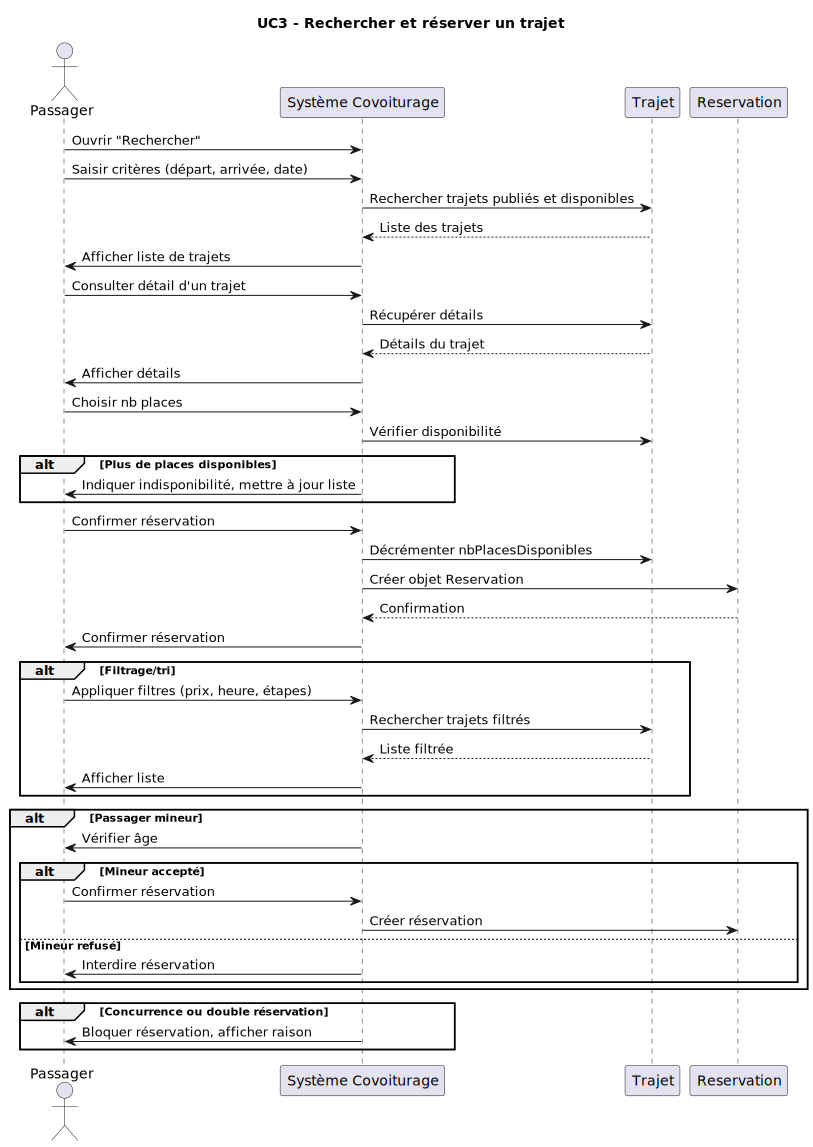

In [ ]:
%%plantuml
@startuml
title UC3 - Rechercher et réserver un trajet

actor Passager as P
participant "Système Covoiturage" as SYS
participant Trajet as T
participant Reservation as R

P -> SYS : Ouvrir "Rechercher"
P -> SYS : Saisir critères (départ, arrivée, date)
SYS -> T : Rechercher trajets publiés et disponibles
T --> SYS : Liste des trajets
SYS -> P : Afficher liste de trajets

P -> SYS : Consulter détail d'un trajet
SYS -> T : Récupérer détails
T --> SYS : Détails du trajet
SYS -> P : Afficher détails

P -> SYS : Choisir nb places
SYS -> T : Vérifier disponibilité
alt Plus de places disponibles
    SYS -> P : Indiquer indisponibilité, mettre à jour liste
end

P -> SYS : Confirmer réservation
SYS -> T : Décrémenter nbPlacesDisponibles
SYS -> R : Créer objet Reservation
R --> SYS : Confirmation
SYS -> P : Confirmer réservation

alt Filtrage/tri
    P -> SYS : Appliquer filtres (prix, heure, étapes)
    SYS -> T : Rechercher trajets filtrés
    T --> SYS : Liste filtrée
    SYS -> P : Afficher liste
end

alt Passager mineur
    SYS -> P : Vérifier âge
    alt Mineur accepté
        P -> SYS : Confirmer réservation
        SYS -> R : Créer réservation
    else Mineur refusé
        SYS -> P : Interdire réservation
    end
end

alt Concurrence ou double réservation
    SYS -> P : Bloquer réservation, afficher raison
end
@enduml


- UC4 : Annuler réservation

/usr/local/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
Writing output for /Users/maximegesset/Files/Univ/M1/UE731/Murisasco/Covoiturage/bce37e81-7a28-43ac-8d92-662424b813c0.uml to bce37e81-7a28-43ac-8d92-662424b813c0.svg


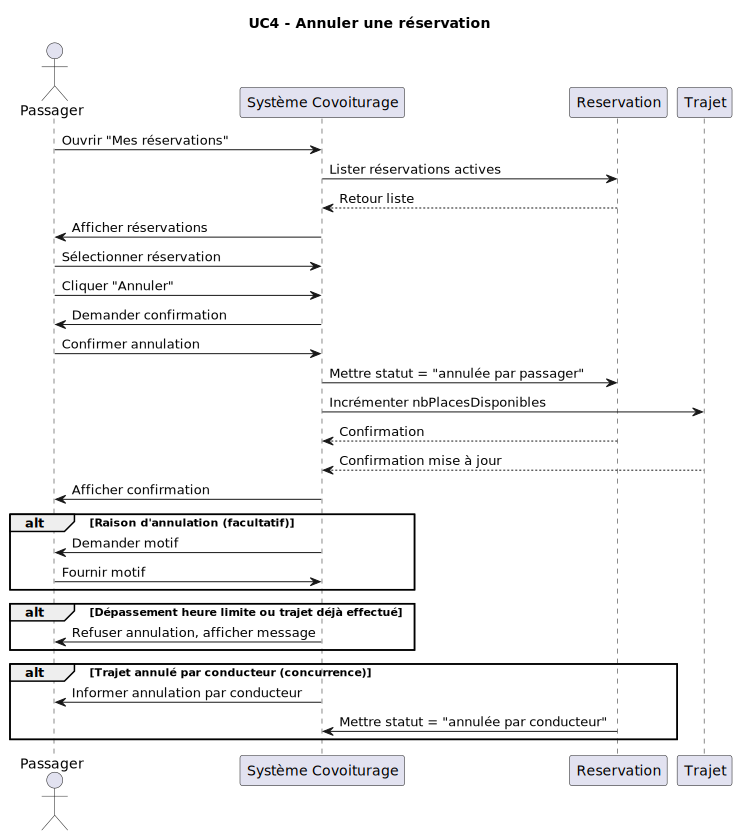

In [ ]:
%%plantuml
@startuml
title UC4 - Annuler une réservation

actor Passager as P
participant "Système Covoiturage" as SYS
participant Reservation as R
participant Trajet as T

P -> SYS : Ouvrir "Mes réservations"
SYS -> R : Lister réservations actives
R --> SYS : Retour liste
SYS -> P : Afficher réservations

P -> SYS : Sélectionner réservation
P -> SYS : Cliquer "Annuler"
SYS -> P : Demander confirmation
P -> SYS : Confirmer annulation

SYS -> R : Mettre statut = "annulée par passager"
SYS -> T : Incrémenter nbPlacesDisponibles
R --> SYS : Confirmation
T --> SYS : Confirmation mise à jour
SYS -> P : Afficher confirmation

alt Raison d'annulation (facultatif)
    SYS -> P : Demander motif
    P -> SYS : Fournir motif
end

alt Dépassement heure limite ou trajet déjà effectué
    SYS -> P : Refuser annulation, afficher message
end

alt Trajet annulé par conducteur (concurrence)
    SYS -> P : Informer annulation par conducteur
    R -> SYS : Mettre statut = "annulée par conducteur"
end
@enduml


- UC5 : Laisser un avis

/usr/local/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
Writing output for /Users/maximegesset/Files/Univ/M1/UE731/Murisasco/Covoiturage/e978ff86-e20f-4540-a18c-c3424ebacf74.uml to e978ff86-e20f-4540-a18c-c3424ebacf74.svg


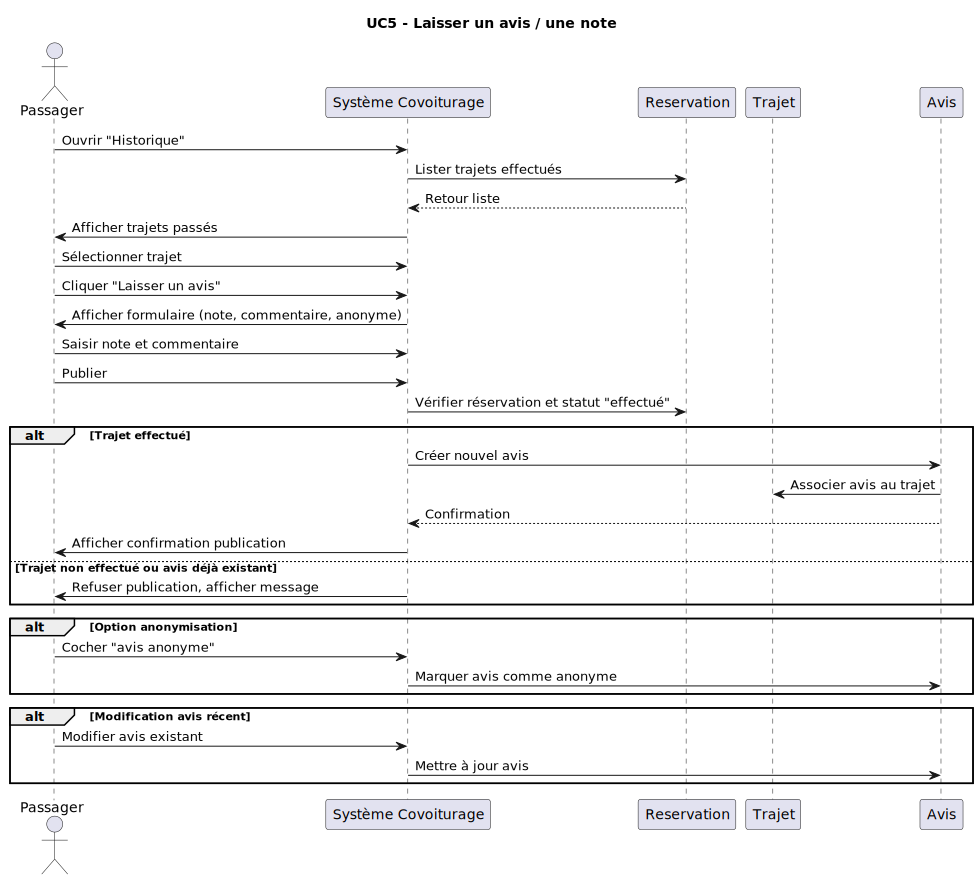

In [ ]:
%%plantuml
@startuml
title UC5 - Laisser un avis / une note

actor Passager as P
participant "Système Covoiturage" as SYS
participant Reservation as R
participant Trajet as T
participant Avis as A

P -> SYS : Ouvrir "Historique"
SYS -> R : Lister trajets effectués
R --> SYS : Retour liste
SYS -> P : Afficher trajets passés

P -> SYS : Sélectionner trajet
P -> SYS : Cliquer "Laisser un avis"
SYS -> P : Afficher formulaire (note, commentaire, anonyme)
P -> SYS : Saisir note et commentaire
P -> SYS : Publier

SYS -> R : Vérifier réservation et statut "effectué"
alt Trajet effectué
    SYS -> A : Créer nouvel avis
    A -> T : Associer avis au trajet
    A --> SYS : Confirmation
    SYS -> P : Afficher confirmation publication
else Trajet non effectué ou avis déjà existant
    SYS -> P : Refuser publication, afficher message
end

alt Option anonymisation
    P -> SYS : Cocher "avis anonyme"
    SYS -> A : Marquer avis comme anonyme
end

alt Modification avis récent
    P -> SYS : Modifier avis existant
    SYS -> A : Mettre à jour avis
end
@enduml



- UC6 :

/usr/local/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
Writing output for /Users/maximegesset/Files/Univ/M1/UE731/Murisasco/Covoiturage/2515f278-cc14-4c7a-80ec-9124047a9ab3.uml to 2515f278-cc14-4c7a-80ec-9124047a9ab3.svg


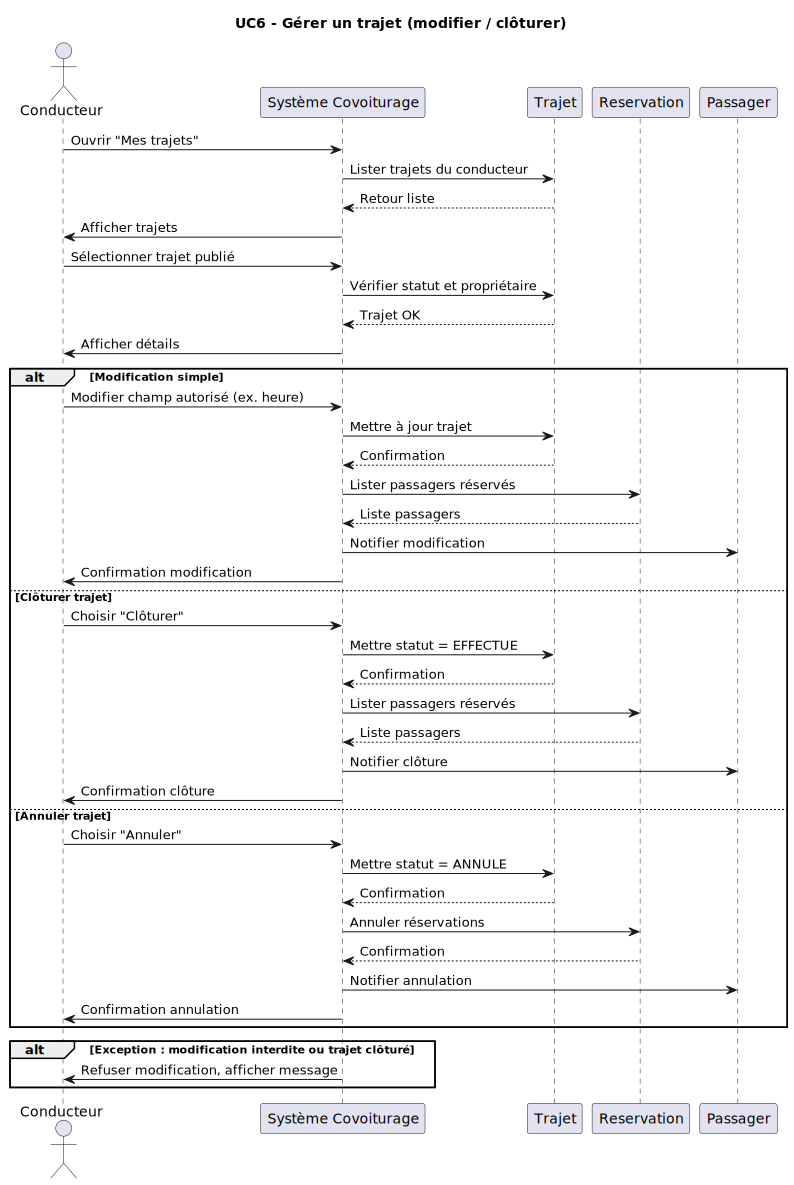

In [ ]:
%%plantuml
@startuml
title UC6 - Gérer un trajet (modifier / clôturer)

actor Conducteur as C
participant "Système Covoiturage" as SYS
participant Trajet as T
participant Reservation as R
participant Passager as P

C -> SYS : Ouvrir "Mes trajets"
SYS -> T : Lister trajets du conducteur
T --> SYS : Retour liste
SYS -> C : Afficher trajets

C -> SYS : Sélectionner trajet publié
SYS -> T : Vérifier statut et propriétaire
T --> SYS : Trajet OK
SYS -> C : Afficher détails

alt Modification simple
    C -> SYS : Modifier champ autorisé (ex. heure)
    SYS -> T : Mettre à jour trajet
    T --> SYS : Confirmation
    SYS -> R : Lister passagers réservés
    R --> SYS : Liste passagers
    SYS -> P : Notifier modification
    SYS -> C : Confirmation modification
else Clôturer trajet
    C -> SYS : Choisir "Clôturer"
    SYS -> T : Mettre statut = EFFECTUE
    T --> SYS : Confirmation
    SYS -> R : Lister passagers réservés
    R --> SYS : Liste passagers
    SYS -> P : Notifier clôture
    SYS -> C : Confirmation clôture
else Annuler trajet
    C -> SYS : Choisir "Annuler"
    SYS -> T : Mettre statut = ANNULE
    T --> SYS : Confirmation
    SYS -> R : Annuler réservations
    R --> SYS : Confirmation
    SYS -> P : Notifier annulation
    SYS -> C : Confirmation annulation
end

alt Exception : modification interdite ou trajet clôturé
    SYS -> C : Refuser modification, afficher message
end
@enduml


- UC7 : 

In [ ]:
%%plantuml
@startuml

actor Conducteur as C
participant "Système Covoiturage" as SYS
participant Document as D
participant "Service Vérification Documents" as DOC

C -> SYS : Ouvrir "Mes documents"
SYS -> D : Lister documents existants
D --> SYS : Retour documents
SYS -> C : Afficher documents

C -> SYS : Téléverser justificatifs (Permis, CT)
SYS -> D : Vérifier format et lisibilité
D --> SYS : Validation OK / Erreur

alt Document valide
    SYS -> D : Enregistrer document
    SYS -> DOC : Lancer vérification
    DOC --> SYS : Statut validé
    SYS -> C : Confirmation document valide
else Vérification différée
    SYS -> D : Marquer statut = EN_COURS
    SYS -> C : Notification vérification en cours
else Document expiré ou illisible
    SYS -> C : Refuser document, demander nouveau fichier
else Vérification échouée
    DOC --> SYS : Statut REFUSE
    SYS -> C : Notification refus document
end
@enduml

SyntaxError: invalid syntax (1625633096.py, line 3)

Diagramme de classe : 

/usr/local/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
Writing output for /Users/maximegesset/Files/Univ/M1/UE731/Murisasco/Covoiturage/ee72bedc-802d-431d-aeff-4d637e7514e8.uml to ee72bedc-802d-431d-aeff-4d637e7514e8.svg


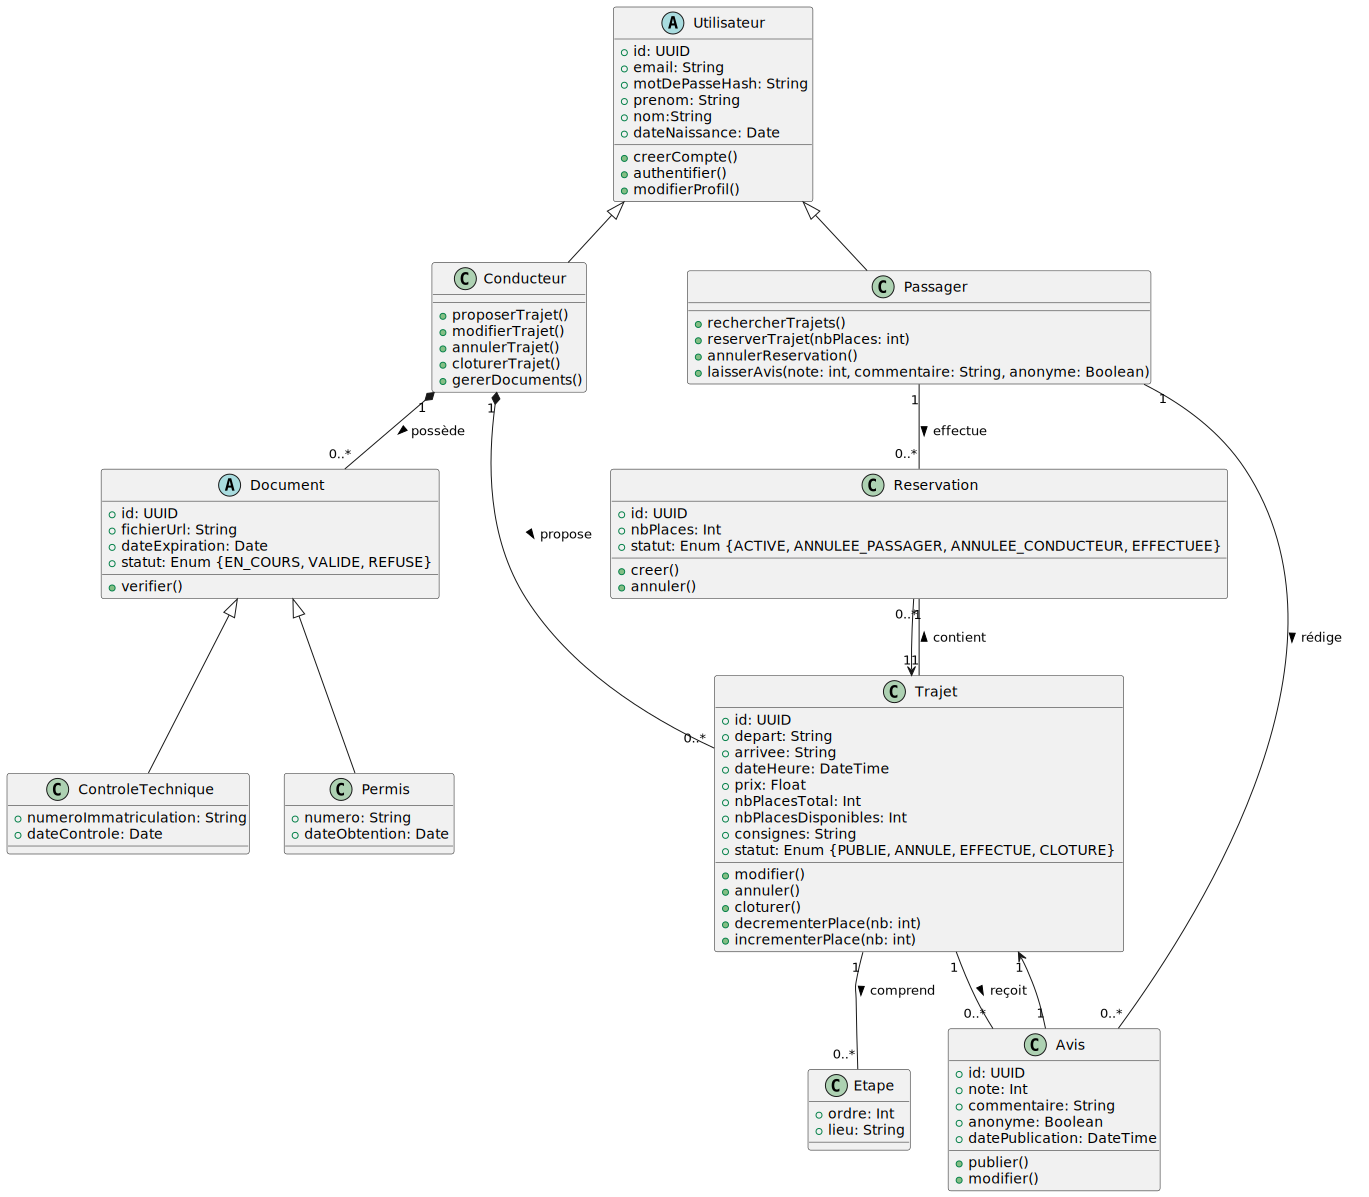

In [ ]:
%%plantuml
@startuml
abstract class Utilisateur {
    +id: UUID
    +email: String
    +motDePasseHash: String
    +prenom: String
    +nom:String
    +dateNaissance: Date
    +creerCompte()
    +authentifier()
    +modifierProfil()
}

class Passager {
    +rechercherTrajets()
    +reserverTrajet(nbPlaces: int)
    +annulerReservation()
    +laisserAvis(note: int, commentaire: String, anonyme: Boolean)
}

class Conducteur {
    +proposerTrajet()
    +modifierTrajet()
    +annulerTrajet()
    +cloturerTrajet()
    +gererDocuments()
}

class Trajet {
    +id: UUID
    +depart: String
    +arrivee: String
    +dateHeure: DateTime
    +prix: Float
    +nbPlacesTotal: Int
    +nbPlacesDisponibles: Int
    +consignes: String
    +statut: Enum {PUBLIE, ANNULE, EFFECTUE, CLOTURE}
    +modifier()
    +annuler()
    +cloturer()
    +decrementerPlace(nb: int)
    +incrementerPlace(nb: int)
}

class Etape {
    +ordre: Int
    +lieu: String
}

class Reservation {
    +id: UUID
    +nbPlaces: Int
    +statut: Enum {ACTIVE, ANNULEE_PASSAGER, ANNULEE_CONDUCTEUR, EFFECTUEE}
    +creer()
    +annuler()
}

class Avis {
    +id: UUID
    +note: Int
    +commentaire: String
    +anonyme: Boolean
    +datePublication: DateTime
    +publier()
    +modifier()
}

abstract class Document {
    +id: UUID
    +fichierUrl: String
    +dateExpiration: Date
    +statut: Enum {EN_COURS, VALIDE, REFUSE}
    +verifier()
}

class Permis {
    +numero: String
    +dateObtention: Date
}

class ControleTechnique {
    +numeroImmatriculation: String
    +dateControle: Date
}

' Relations d'héritage
Utilisateur <|-- Passager
Utilisateur <|-- Conducteur
Document <|-- Permis
Document <|-- ControleTechnique

' Associations
Conducteur "1" *-- "0..*" Trajet : propose >
Conducteur "1" *-- "0..*" Document : possède >

Passager "1" -- "0..*" Reservation : effectue >
Passager "1" -- "0..*" Avis : rédige >

Trajet "1" -- "0..*" Avis : reçoit >
Trajet "1" -- "0..*" Reservation : contient >
Trajet "1" -- "0..*" Etape : comprend >

Reservation "1" --> "1" Trajet

Avis "1" --> "1" Trajet
@enduml